# Lab 5: Clustering Techniques Using DBSCAN and Hierarchical Clustering

**Name:** Vishnu Mallam  
**Course Title:** Advanced Big Data and Data Mining  
**Lab Assignment Title:** Lab 5 - Clustering with DBSCAN and Hierarchical Clustering


In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)

# Explore dataset
print(df.head())
print(df.info())
print(df.describe())

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

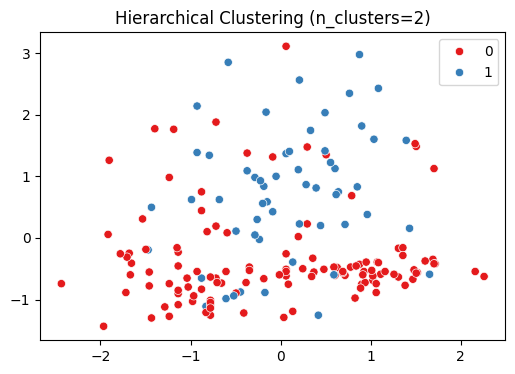

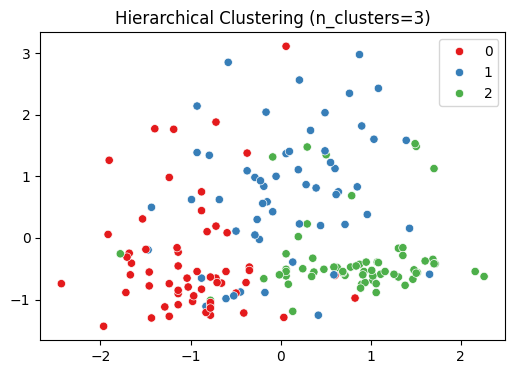

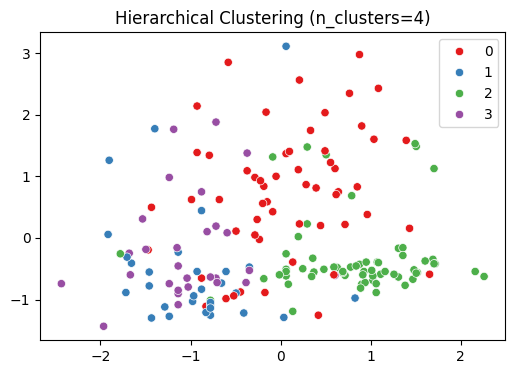

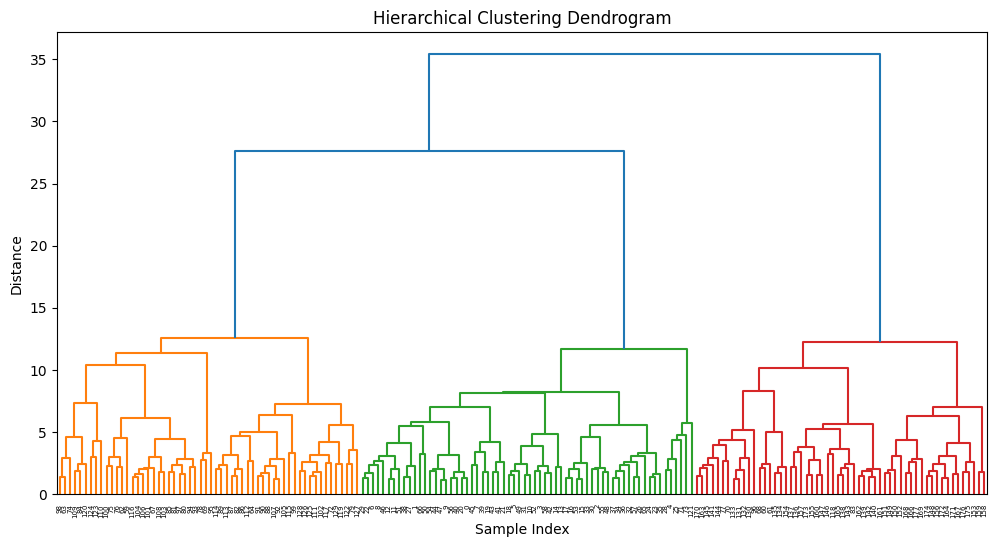

In [2]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Try different number of clusters
for n in [2, 3, 4]:
    model = AgglomerativeClustering(n_clusters=n)
    clusters = model.fit_predict(X_scaled)
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, palette='Set1')
    plt.title(f'Hierarchical Clustering (n_clusters={n})')
    plt.show()

# Dendrogram
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


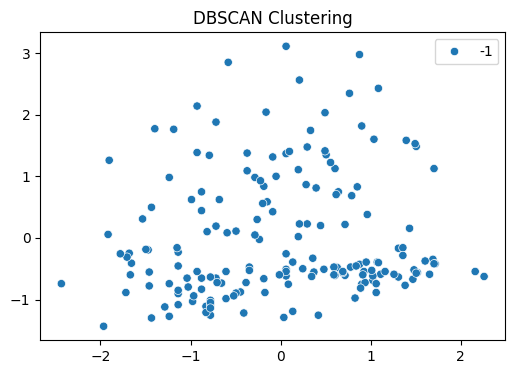

Silhouette Score: N/A (due to noise or single cluster)
Homogeneity Score: 0.0
Completeness Score: 1.0


In [3]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score

# Try DBSCAN with different eps and min_samples
db = DBSCAN(eps=1.5, min_samples=5)
labels = db.fit_predict(X_scaled)

# Visualize
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette='tab10')
plt.title('DBSCAN Clustering')
plt.show()

# Metrics
# Note: DBSCAN may label some points as -1 (noise), filter these if needed for some metrics
if len(set(labels)) > 1 and -1 not in set(labels):
    sil_score = silhouette_score(X_scaled, labels)
else:
    sil_score = "N/A (due to noise or single cluster)"

print("Silhouette Score:", sil_score)
print("Homogeneity Score:", homogeneity_score(wine.target, labels))
print("Completeness Score:", completeness_score(wine.target, labels))


##  Analysis and Insights

### Comparison of Clustering Methods:
- **Hierarchical Clustering**:
  - Provided clear structure and clustering hierarchy.
  - Dendrogram helped choose optimal `n_clusters`.
  - Well suited when the number of clusters is known or can be inferred.

- **DBSCAN**:
  - Identified noise points and non-spherical clusters.
  - Highly sensitive to `eps` and `min_samples`.
  - Ideal when clusters have irregular shapes or unknown numbers.

### Parameter Influence:
- In DBSCAN, increasing `eps` grouped more points together but risked merging separate clusters.
- In Hierarchical, choosing the right `n_clusters` based on dendrogram was crucial.

### Strengths & Weaknesses:
- **Hierarchical**:
  - ✅ Interpretable dendrogram, no initial parameter tuning.
  - ❌ Sensitive to outliers and distance metrics.
- **DBSCAN**:
  - ✅ Robust to outliers and noise.
  - ❌ Parameter tuning is empirical and can be tricky.

